In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv
/kaggle/input/graduate-admissions/Admission_Predict.csv


In [2]:
df=pd.read_csv('/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv')

In [3]:
df.set_index('Serial No.',inplace=True)

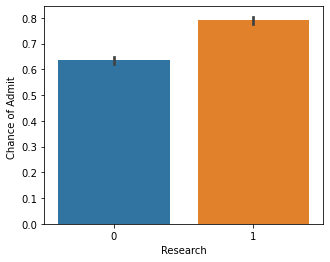

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df.dtypes
plt.figure(figsize=(5,4))
sns.barplot(x='Research',y='Chance of Admit ',data=df)

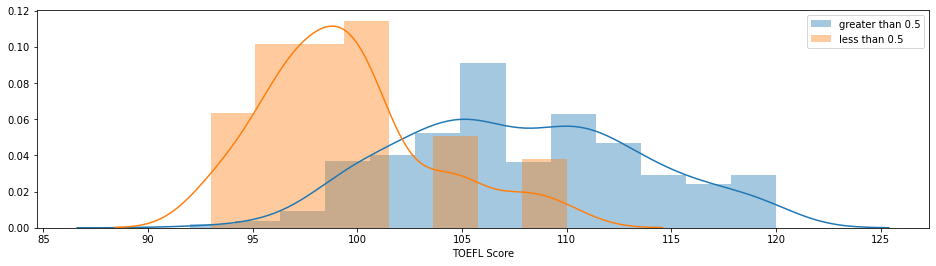

In [5]:
plt.figure(figsize=(16,4))
sns.distplot(a=df[df['Chance of Admit ']>=0.5]['TOEFL Score'],label='greater than 0.5')
sns.distplot(a=df[df['Chance of Admit ']<0.5]['TOEFL Score'],label='less than 0.5')
plt.legend()

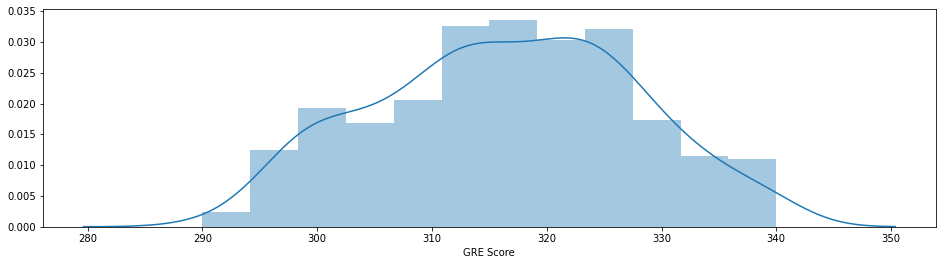

In [6]:
plt.figure(figsize=(16,4))
sns.distplot(a=df['GRE Score'])

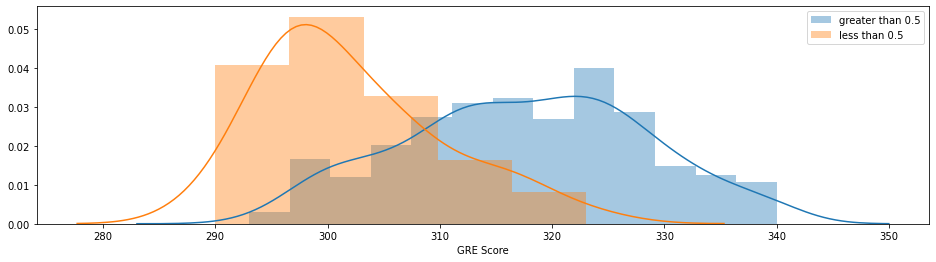

In [7]:
plt.figure(figsize=(16,4))
sns.distplot(a=df[df['Chance of Admit ']>=0.5]['GRE Score'],label='greater than 0.5')
sns.distplot(a=df[df['Chance of Admit ']<0.5]['GRE Score'],label='less than 0.5')
plt.legend()

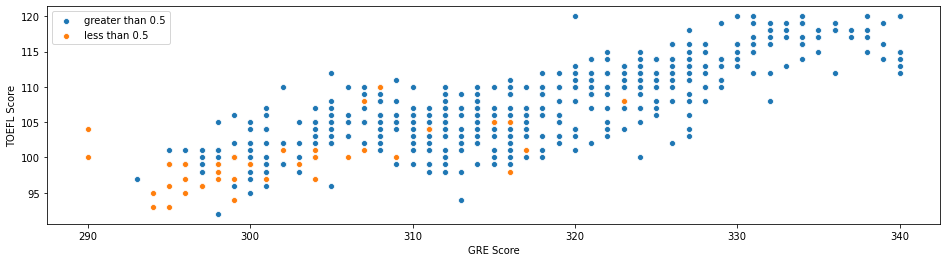

In [8]:
plt.figure(figsize=(16,4))
sns.scatterplot(x='GRE Score',y='TOEFL Score',data=df[df['Chance of Admit ']>=0.5],label='greater than 0.5')
sns.scatterplot(x='GRE Score',y='TOEFL Score',data=df[df['Chance of Admit ']<0.5],label='less than 0.5')

In [9]:
X_train=df.drop('Chance of Admit ',axis=1)[:400]
X_test=df.drop('Chance of Admit ',axis=1)[401:]
y_train=df['Chance of Admit '][:400]
y_test=df['Chance of Admit '][401:]


In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
for x in range(2,12):
    for y in [10,100,500,1000]:    
        reg=RandomForestRegressor(max_depth=x,n_estimators=y)
        reg.fit(X_train,y_train)
        y_pred=reg.predict(X_test)
        print("depth= ",x,'estimators= ',y,' rmse= ',np.sqrt(mean_squared_error(y_test,y_pred)))


depth=  2 estimators=  10  rmse=  0.058075732318621905
depth=  2 estimators=  100  rmse=  0.05645682492687093
depth=  2 estimators=  500  rmse=  0.05496316714514413
depth=  2 estimators=  1000  rmse=  0.05500305764022858
depth=  3 estimators=  10  rmse=  0.051330691512926005
depth=  3 estimators=  100  rmse=  0.04841030227425411
depth=  3 estimators=  500  rmse=  0.04817839267671528
depth=  3 estimators=  1000  rmse=  0.048175812862215756
depth=  4 estimators=  10  rmse=  0.047522087216145675
depth=  4 estimators=  100  rmse=  0.047506205458530903
depth=  4 estimators=  500  rmse=  0.04702059197342334
depth=  4 estimators=  1000  rmse=  0.04700763993936842
depth=  5 estimators=  10  rmse=  0.04696812890282009
depth=  5 estimators=  100  rmse=  0.048590080590399626
depth=  5 estimators=  500  rmse=  0.04715060579649942
depth=  5 estimators=  1000  rmse=  0.047709785198909074
depth=  6 estimators=  10  rmse=  0.05526570908732304
depth=  6 estimators=  100  rmse=  0.04802685295451963
dept

In [11]:
final_reg=RandomForestRegressor(max_depth=4,n_estimators=1000)
final_reg.fit(X_train,y_train)
y_final_pred=final_reg.predict(X_test)
print("Rmse = ",np.sqrt(mean_squared_error(y_test,y_final_pred)))
print('Abs error= ',mean_absolute_error(y_test,y_final_pred))

Rmse =  0.04690714912997742
Abs error=  0.034101281859080165


In [12]:
list(zip(X_train.columns,final_reg.feature_importances_))

[('GRE Score', 0.056242344891343804),
 ('TOEFL Score', 0.015224267388024851),
 ('University Rating', 0.00474507363119753),
 ('SOP', 0.008505550580111059),
 ('LOR ', 0.009900543726692386),
 ('CGPA', 0.8985320155423802),
 ('Research', 0.0068502042402501994)]

In [13]:
X_test.corrwith(y_test)

GRE Score            0.845430
TOEFL Score          0.794977
University Rating    0.614643
SOP                  0.723550
LOR                  0.581802
CGPA                 0.924812
Research             0.527641
dtype: float64